# Assignment 2

Part 1: A Simple Binomial Model

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import comb

def graph(x, y, xlabel, ylabel, title):
    x_max = np.round(x[np.argmax(y)], 5)
    y_max = np.max(y)
    plt.axvline(x = x_max, color = "red", linestyle = '--', label=f'max f(x) at θ={x_max}')
    plt.annotate(f'max at θ={x_max}', xy = (x_max, y_max), xytext = (x_max, y_max*1.18), horizontalalignment= 'center')
    plt.plot(x, y, marker='.', linestyle='', color="green")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

Solution for 1.1

In [37]:
y = 7
def post_density(x, p_x):
    return 11*comb(10,y)*(x**y)*((1-x)**(10-y))*p_x

x = np.arange(0, 1.005, 0.005)
p_x = np.ones_like(x)

a = post_density(0.75, 1)
b = post_density(0.25, 1)
c = post_density(1, 1)
print("1.1.a Ans:" , a)
print("1.1.b Ans:" , b)
print("1.1.c Ans:" , c)

vector = np.vectorize(post_density)
p_y = vector(x,p_x)

1.1.a Ans: 2.7531051635742188
1.1.b Ans: 0.03398895263671875
1.1.c Ans: 0


Solution for 1.2

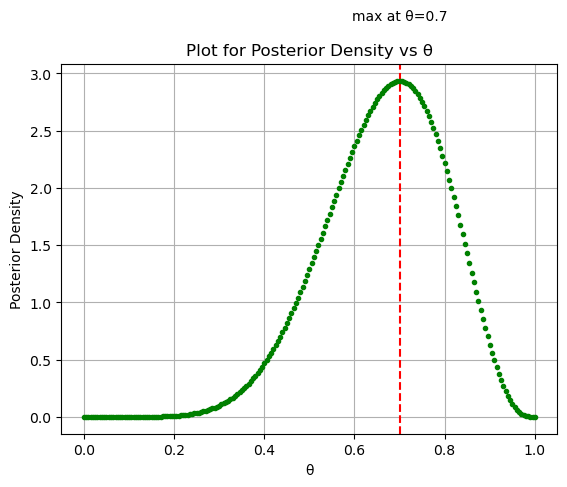

In [38]:
graph(x, p_y, "θ", "Posterior Density", "Plot for Posterior Density vs θ")

Solution for 1.3

In [39]:
print("1.3 Answer: x_max (θ) = 0.7")

1.3 Answer: x_max (θ) = 0.7


Solution for 1.4

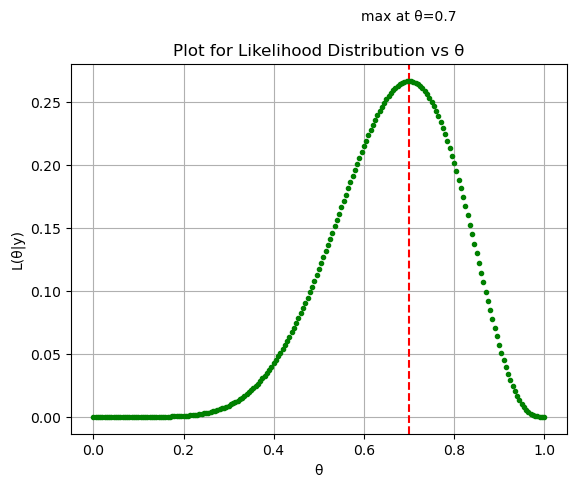

In [40]:
def likelihood(x):
    return comb(10,y)*(x**y)*((1-x)**(10-y))

vector_lkl = np.vectorize(likelihood)
lkl = vector_lkl(x)

graph(x, lkl, "θ", "L(θ|y)", "Plot for Likelihood Distribution vs θ")

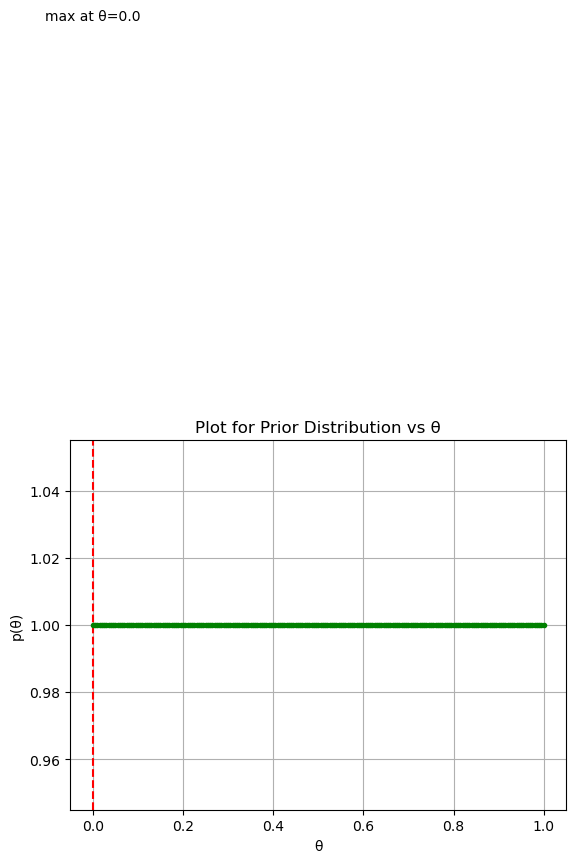

In [41]:
graph(x, p_x, "θ", "p(θ)", "Plot for Prior Distribution vs θ")

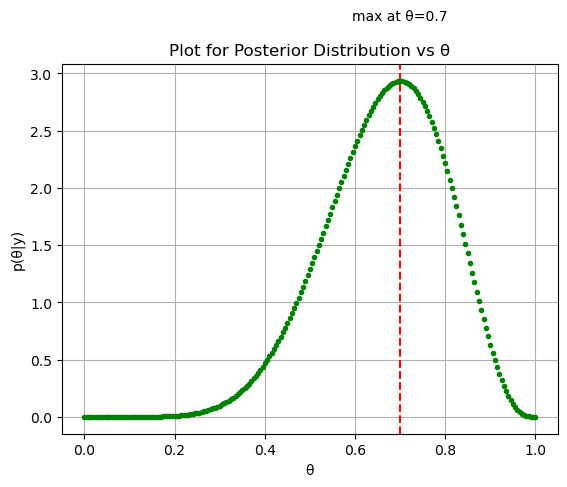

In [42]:
graph(x, p_y, "θ", "p(θ|y)", "Plot for Posterior Distribution vs θ")

Part 2: A Gaussian Model of reading

Solution for 2.1:

In [43]:
from scipy.stats import norm 

y = np.array([300, 270, 390, 450, 500, 290, 680, 450]) 

def lkl(mu, sigma):
    likelihood = norm.pdf(y, loc=mu, scale=sigma) 
    return np.prod(likelihood)

prior_mu = norm(loc=250, scale=25)

def unnorm_post(mu, sigma):
    return lkl(mu, sigma) * prior_mu.pdf(mu) 
print("Unnormalized posterior density for mu = 300 is =", unnorm_post(300,50)) 
print("Unnormalized posterior density for mu = 900 is =", unnorm_post(900,50)) 
print("Unnormalized posterior density for mu = 50 is =", unnorm_post(50,50))

Unnormalized posterior density for mu = 300 is = 6.824247957486434e-41
Unnormalized posterior density for mu = 900 is = 0.0
Unnormalized posterior density for mu = 50 is = 9.691373559300603e-138


Solution for 2.2:

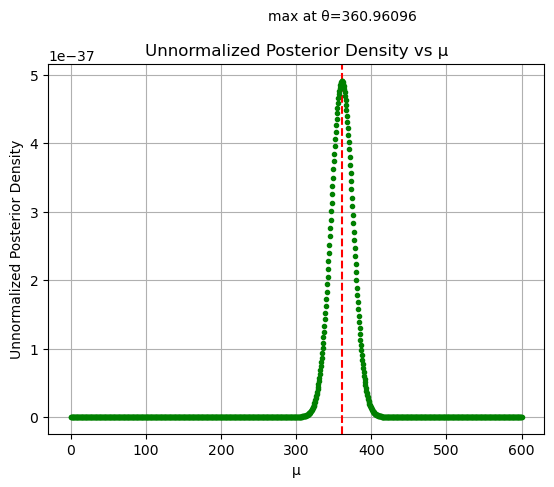

In [45]:
mu_range = np.linspace(0, 600, 1000)
posterior_range = [unnorm_post(mu, 50) for mu in mu_range]
graph(mu_range,posterior_range,"μ","Unnormalized Posterior Density","Unnormalized Posterior Density vs μ")

Solution for 2.3:

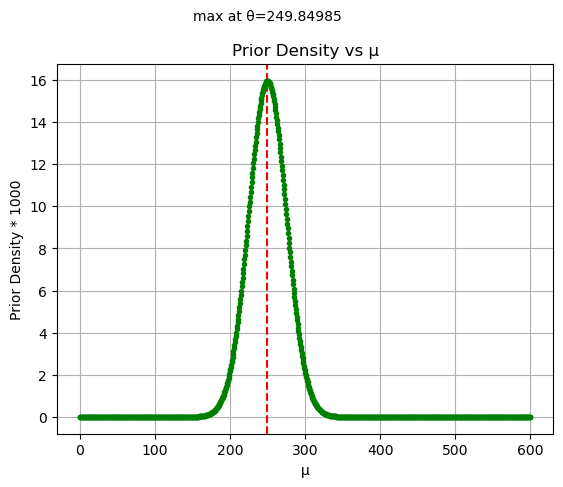

In [46]:
prior_density = prior_mu.pdf(np.linspace(0, 600, 1000))
prior_range = prior_density*1000
graph(mu_range, prior_range, "μ", "Prior Density * 1000", "Prior Density vs μ")

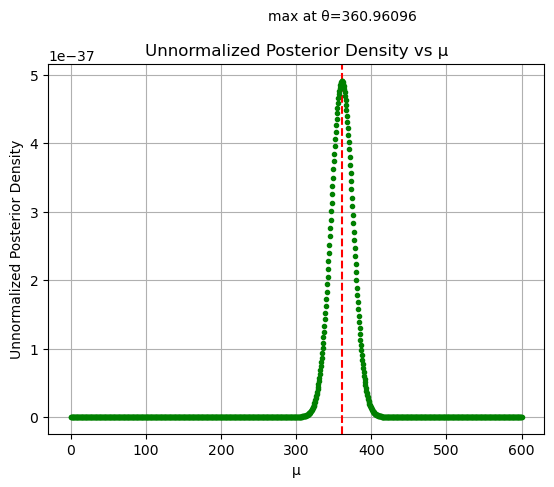

In [47]:
graph(mu_range,posterior_range,"μ","Unnormalized Posterior Density","Unnormalized Posterior Density vs μ")

Part 3: The Bayesian learning

Solution for 3.1:

In [48]:
data = np.array([25,20,23,27])
first_parameter = 40
second_parameter = 2
for k in data:
    first_parameter = first_parameter + k
    second_parameter = second_parameter + 1

print("For Day 5, prior on λ to generate predictions is = Gamma(", first_parameter, ",", second_parameter, ")")

For Day 5, prior on λ to generate predictions is = Gamma( 135 , 6 )


Solution for 3.2:

To predict the number of road accidents on day 5, we use the prior on λ after 4th day that is used to generate predictions for day 5 which is Gamma(135,6).

The mean of a Gamma distribution Gamma(α,β) is given by: 
μ = α/β
Therefore, for Gamma(135,6), the mean (μ) = 135/6 = 22.5

The number of road accidents in a day is a Poisson distribution on λ, which is 
the mean rate of accidents on the day. Thus, the predicted number of road accidents on day 5 would be the expected value of λ for λ~Gamma(135,6). This expected value of λ would be the mean for Gamma(135,6) = 22.5                                                                                                    
Therefore, the predicted number of road accidents on day 5 is 22 which is a integer value.

Part 4: Model Building in the Bayesian Framework

Solution for 4.5.1:

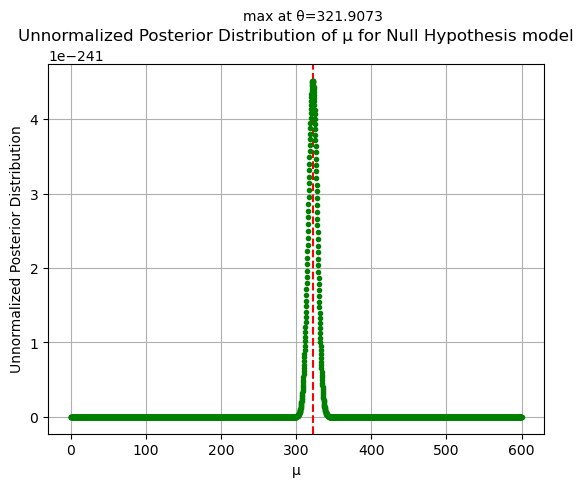

In [52]:
link = "https://raw.githubusercontent.com/yadavhimanshu059/CGS698C/main/notes/Module-2/recognition.csv"
data = pd.read_csv(link) 
Tw = data['Tw']
Tnw = data['Tnw']

def null_unnorm_post(mu, Tw, Tnw, sigma=60):
    L_Tw = np.prod(norm.pdf(Tw, loc=mu, scale=sigma)) 
    L_Tnw = np.prod(norm.pdf(Tnw, loc=mu, scale=sigma)) 
    p_mu = norm.pdf(mu, loc=300, scale=50)
    return L_Tw * L_Tnw * p_mu 

mu_range = np.linspace(0, 600, 3000)
posterior_range = [null_unnorm_post(mu, Tw, Tnw) for mu in mu_range]
graph(mu_range, posterior_range,"μ","Unnormalized Posterior Distribution","Unnormalized Posterior Distribution of μ for Null Hypothesis model")

Solution for 4.5.2:

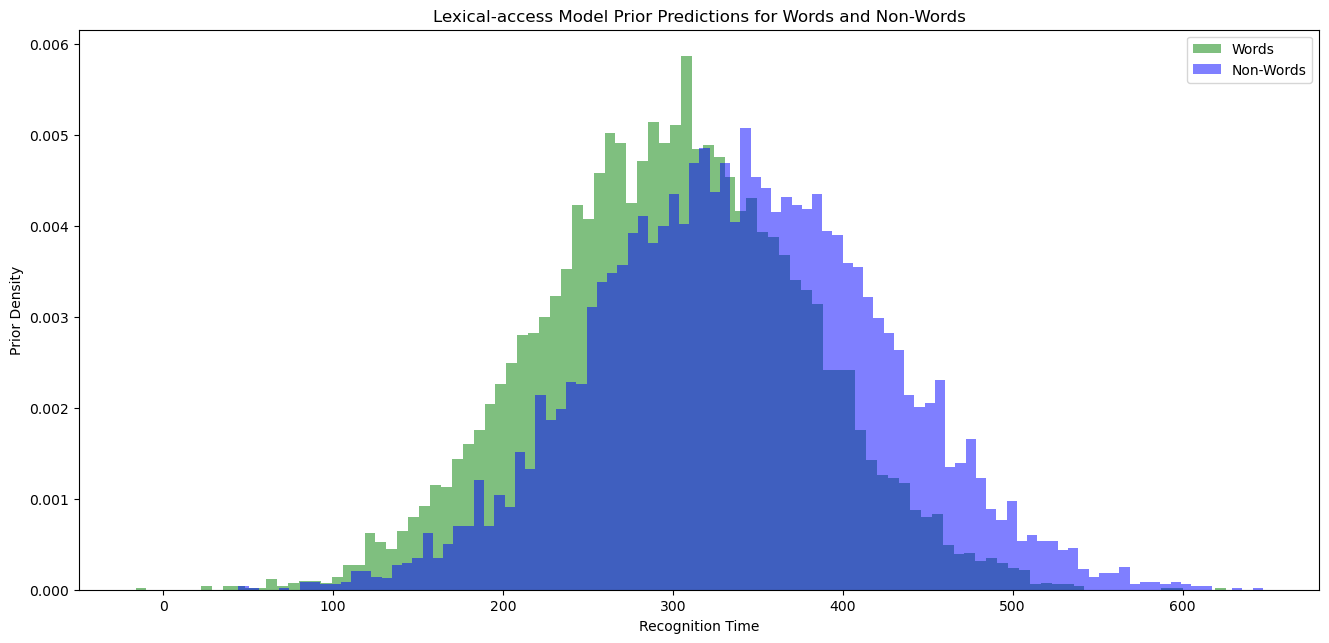

In [71]:
from scipy.stats import truncnorm
 
np.random.seed(256)
prior_mu = np.random.normal(loc=300, scale=50, size=8000) 
a, b = 0, np.inf
prior_delta = truncnorm.rvs(a, b, loc=0, scale=50, size=8000) 
prior_Tw = np.random.normal(loc= prior_mu, scale=60, size=8000) 
prior_Tnw = np.random.normal(loc= prior_mu+prior_delta, scale=60, size=8000)

plt.figure(figsize=(16, 16))
plt.subplot(2, 1, 1)
plt.hist(prior_Tw, bins=100, density=True, alpha=0.5, color='green', label='Words')
plt.hist(prior_Tnw, bins=100, density=True, alpha=0.5, color='blue', label='Non-Words')
plt.xlabel('Recognition Time')
plt.ylabel('Prior Density')
plt.title('Lexical-access Model Prior Predictions for Words and Non-Words')
plt.legend(loc="upper right")
plt.show()

Solution for 4.5.3:

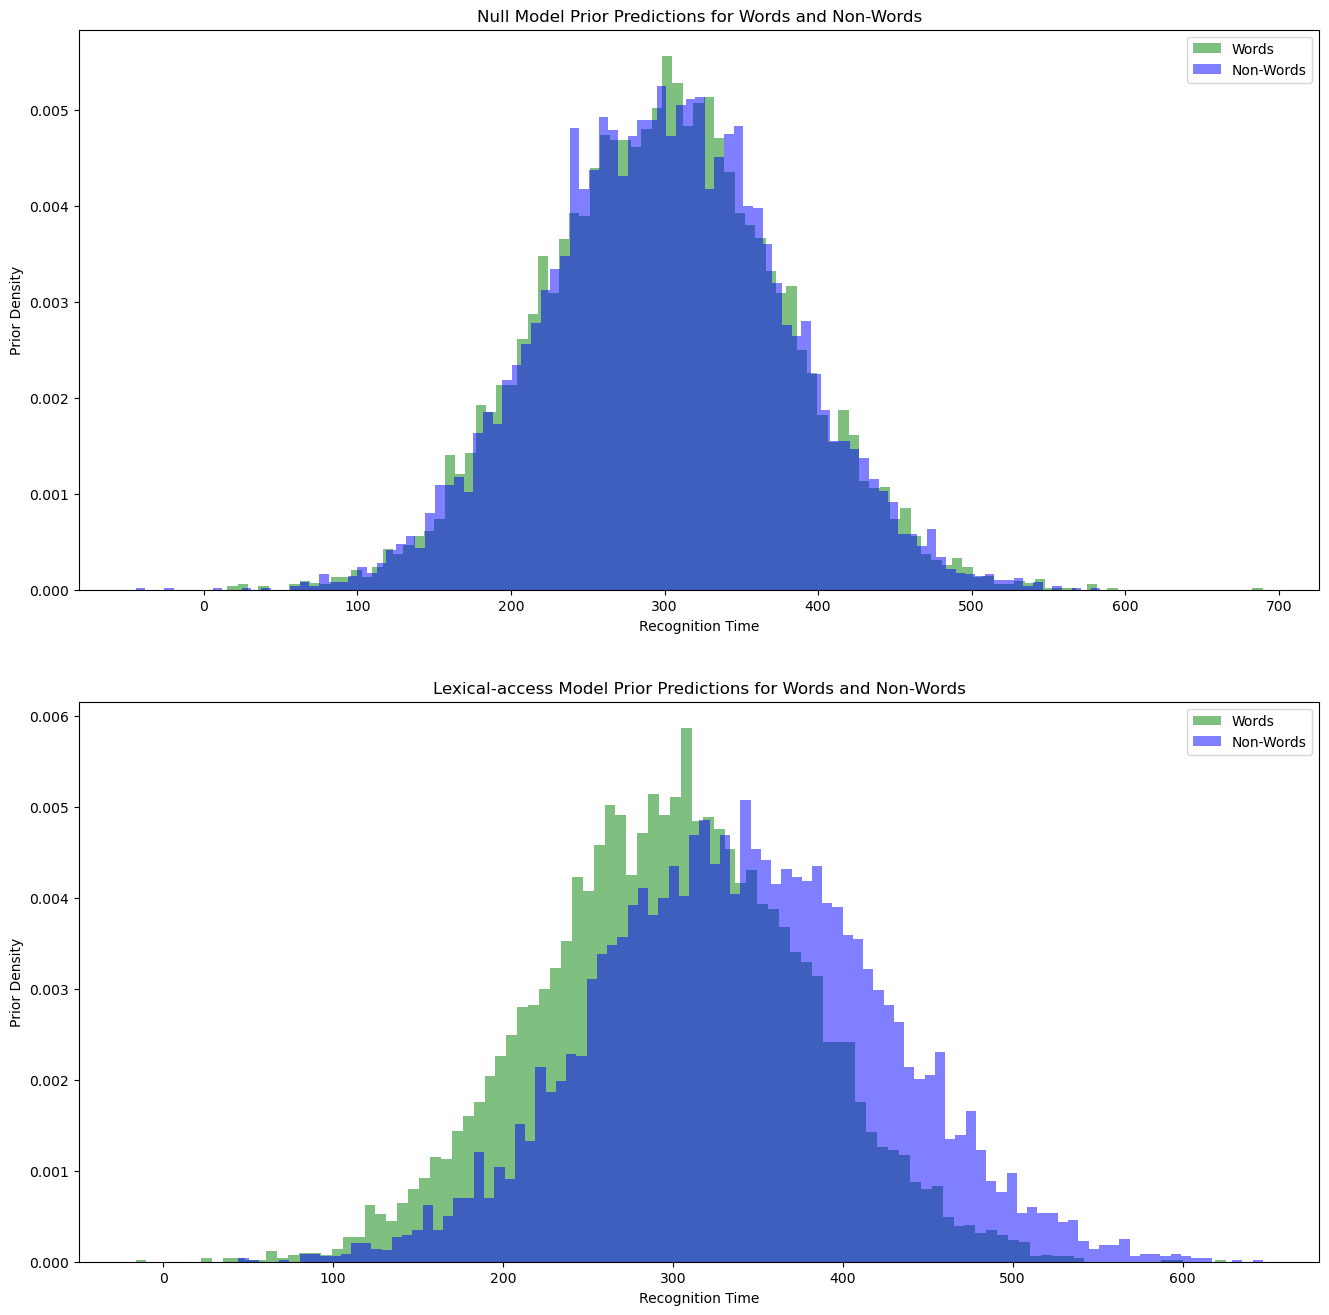

In [72]:
prior_mu_null = np.random.normal(loc=300, scale=50, size=8000) 
prior_Tw_null = np.random.normal(loc=prior_mu_null, scale=60, size=8000)
prior_Tnw_null = np.random.normal(loc=prior_mu_null, scale=60, size=8000)

plt.figure(figsize=(16, 16))

plt.subplot(2,1,1)
plt.hist(prior_Tw_null, bins=100, density=True, alpha=0.5, color='green', label='Words')
plt.hist(prior_Tnw_null, bins=100, density=True, alpha=0.5, color='blue', label='Non-Words')
plt.xlabel('Recognition Time')
plt.ylabel('Prior Density')
plt.title('Null Model Prior Predictions for Words and Non-Words')
plt.legend(loc="upper right")

plt.subplot(2,1,2)
plt.hist(prior_Tw, bins=100, density=True, alpha=0.5, color='green', label='Words')
plt.hist(prior_Tnw, bins=100, density=True, alpha=0.5, color='blue', label='Non-Words')
plt.xlabel('Recognition Time')
plt.ylabel('Prior Density')
plt.title('Lexical-access Model Prior Predictions for Words and Non-Words')
plt.legend(loc="upper right")
plt.show()

In Null Model Prior Predictions of recognition time towards words and non-words is largely overlapping which shows that the recognition times for "Words" and "Non-Words" are closely same.
Unlike the null model, in the Lexical-access Model Prior Predictions of recognition time towards words and non-words, there is slighly slower recognition time for "Words" as compared to "Non-Words".

Solution for 4.5.4:

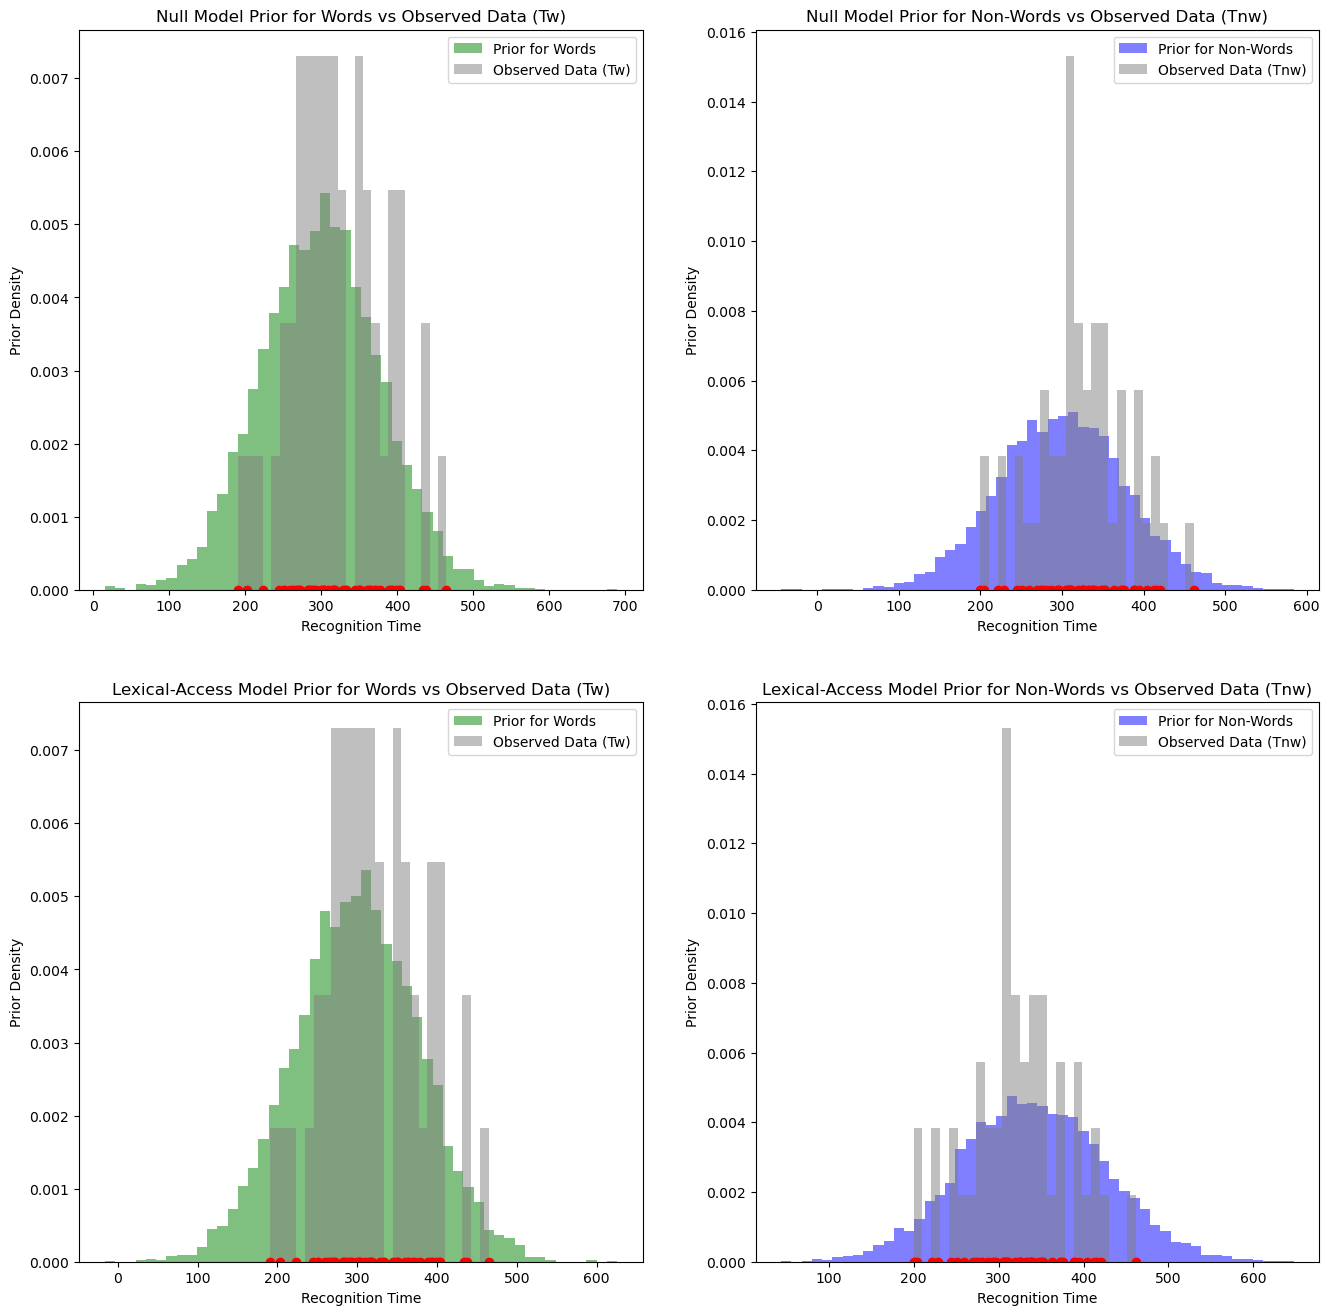

In [86]:
plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
plt.hist(prior_Tw_null, bins=50, density=True, alpha=0.5, color='green', label='Prior for Words')
plt.hist(Tw, bins=25, density=True ,alpha=0.5, color = 'gray', label='Observed Data (Tw)' )
plt.scatter(Tw, np.zeros_like(Tw), color='red')
plt.title('Null Model Prior for Words vs Observed Data (Tw)')
plt.xlabel('Recognition Time')
plt.ylabel('Prior Density')
plt.legend(loc="upper right")

plt.subplot(2, 2, 2)
plt.hist(prior_Tnw_null, bins=50, density=True, alpha=0.5, color='blue', label='Prior for Non-Words') 
plt.hist(Tnw, bins=25, density=True ,alpha=0.5, color = 'gray', label='Observed Data (Tnw)' )
plt.scatter(Tnw, np.zeros_like(Tnw), color='red')
plt.title('Null Model Prior for Non-Words vs Observed Data (Tnw)')
plt.xlabel('Recognition Time')
plt.ylabel('Prior Density')
plt.legend(loc="upper right")

plt.subplot(2, 2, 3)
plt.hist(prior_Tw, bins=50, density=True, alpha=0.5, color='green', label='Prior for Words')
plt.hist(Tw, bins=25, density=True ,alpha=0.5, color = 'gray', label='Observed Data (Tw)' )
plt.scatter(Tw, np.zeros_like(Tw), color='red')
plt.title('Lexical-Access Model Prior for Words vs Observed Data (Tw)')
plt.xlabel('Recognition Time')
plt.ylabel('Prior Density')
plt.legend(loc="upper right")

plt.subplot(2, 2, 4)
plt.hist(prior_Tnw, bins=50, density=True, alpha=0.5, color='blue', label='Prior for Non-Words')
plt.hist(Tnw, bins=25, density=True ,alpha=0.5, color = 'gray', label='Observed Data (Tnw)' )
plt.scatter(Tnw, np.zeros_like(Tnw), color='red') 
plt.title('Lexical-Access Model Prior for Non-Words vs Observed Data (Tnw)')
plt.xlabel('Recognition Time')
plt.ylabel('Prior Density')
plt.legend(loc="upper right")
plt.show()

Null Model Prior Predictions and Lexical-Access Model Prior Predictions both showcase a closely similar distribution for recognition times for "Words". Therefore, they both work fine with the observed data (Tw).

For "Non-Words", the Lexical-Access Model fits the data for "Non-Words" accurately that works fine with the observed data (Tnw). 
While the Null Model Prior Predictions predict faster recognition times than the observed data (Tnw).

Solution for 4.5.5:

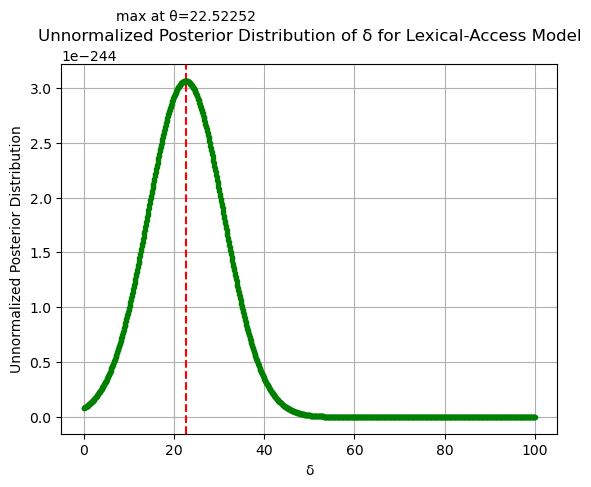

In [95]:
def lexical_unnorm_post(delta, mu, Tw, Tnw, sigma=60): 
    L_Tw = np.prod(norm.pdf(Tw, loc=mu, scale=sigma))
    L_Tnw = np.prod(norm.pdf(Tnw, loc = mu+delta, scale=sigma)) 
    p_mu = norm.pdf(mu, loc=300, scale=50)
    p_delta = truncnorm.pdf(delta, a=0, b=np.inf, loc=0, scale=50) 
    return L_Tw * L_Tnw * p_mu * p_delta

delta_range = np.linspace(0, 100, 1000) 
mu_mean = np.mean(prior_mu)
posterior_delta_range = [lexical_unnorm_post(delta, mu_mean, Tw, Tnw) for delta in delta_range]
graph(delta_range, posterior_delta_range,"ẟ","Unnormalized Posterior Distribution","Unnormalized Posterior Distribution of ẟ for Lexical-Access Model")